# Derin öğrenme Tabanlı Modern Dil Modelleri
- Word Embeddings (Kelimelerin vektör temsilleri)
- Recurrent Neural Networks (RNN)
- Long Short-Term Memory (LSTM)
- Transformers Modelleri :Bert ,GPT,LLAMA


# Word  Embeddings (Kelimelerin Vektör Temsilleri )
- Word embeddings ,kelimeleri sayısal vektörlerle ifade eden bir yöntemdir.
- Bu temsiller,kelimeler arasındaki anlamsal ilişkileri öğrenmeyi sağlar
- Aynı anlamda veya benzer anlamda kullanılan kelimeler ,vektör uzayında birbirine yakın olur  

# Neden kelimeleri vektörlerle temsil etmeliyiz? 
- Dil anlamı yakalama
- Matematiksel işlemler
- Verimli temsil 


# Word2Vec Nedir ?
- Özellikleri ve avantajları 
    - Anlamsal yakınlıkları kelime komşuluklarına göre öğrenir
    - Kelimeler arasında anlamlı matematiksel işlemler yapmayı sağlar.
- Kim Geliştirdi?
    - Google Tohamas Mikolov ve ekibi
- Kullanılan veri set :Google News corpus.
- Kaynak :Haber metinleri
- Büyüklük :Yaklaşık 100 milyar kelime

In [ ]:
Word2vec Nedir ? 
- Temel Modelleri : CBOW (Continous Bag of Words ve Skip-gram )

CBOW : çevresindeki bağlam kelimelerle target bulmaya çalışır
Skipgram : target kelime ile bağlam kelimeleri bulmaya çalışır

# FastText 
- Özellikleri ve avantajları 
    - Kelimeleri karakter seviyesinde de öğrenir,nadir kelimeler için daha güçlü bir modeldir
- Kim geliştirdi ? 
    - Facebook AL
- Kullanılan veri seti
    - Wikipedia ,comma crawl gibi büyük veri setleri 

| Özellik      | Word2Vec                                       | FastText                                                |
|---------     |------------------------------------------------|---------------------------------------------------------|
| Temel Yöntem | Kelimeler arasındaki  komşulukları kullanır    | Kelimeleri karakter temsil eder                         | 
| Kapsam       | Sabit Kelime vektörleri                        | Alt kelime bilgisiyle nadir kelimeleri daha iyi öğrenir |


# Vektör uzayı ve anlam yakınlığı nedir ?
 - Kelimelerin vektör temsilleri , anlamlarına göre vektör uzayında konumlandırılır 
 - Anlamca benzer kelimeler(örneğin :"kedi" ve "köpek" ) vektör uzayında birbirne yakın olurken , farklı anlamdaki kelimeler (örneğin :"kedi" ve "araba" ) uzakta yer alır.
 - Yakınlık ve uzaklık ayrımı Kosinüs Benzerliği ile yapılabilir.
 

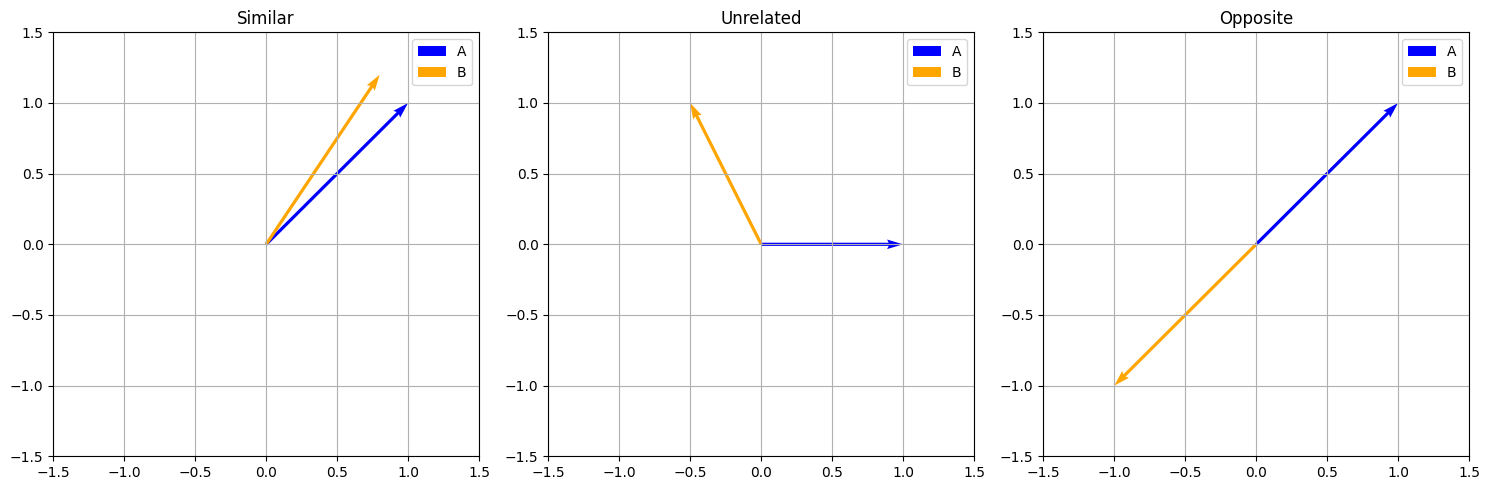

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vektör tanımları
similar_a = np.array([1, 1])
similar_b = np.array([0.8, 1.2])  

unrelated_a = np.array([1, 0])
unrelated_b = np.array([-0.5, 1])  

opposite_a = np.array([1, 1])
opposite_b = np.array([-1, -1])

# Grafik çizim alanını oluştur
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Similar (Benzer)
axes[0].quiver(0, 0, similar_a[0], similar_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A')
axes[0].quiver(0, 0, similar_b[0], similar_b[1], angles='xy', scale_units='xy', scale=1, color='orange', label='B')
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)
axes[0].grid(True)
axes[0].set_title('Similar')
axes[0].legend()

# Unrelated (İlişkisiz)
axes[1].quiver(0, 0, unrelated_a[0], unrelated_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A')
axes[1].quiver(0, 0, unrelated_b[0], unrelated_b[1], angles='xy', scale_units='xy', scale=1, color='orange', label='B')
axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)
axes[1].grid(True)
axes[1].set_title('Unrelated')
axes[1].legend()

# Opposite (Zıt)
axes[2].quiver(0, 0, opposite_a[0], opposite_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A')
axes[2].quiver(0, 0, opposite_b[0], opposite_b[1], angles='xy', scale_units='xy', scale=1, color='orange', label='B')
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)
axes[2].grid(True)
axes[2].set_title('Opposite')
axes[2].legend()

# Genel ayarlar
plt.tight_layout()
plt.show()


# Benzerliklerin Görselleştirilmesi (t-SNE,PCA)

# Recurrent Neural Networks (RNN)

- Zaman serisi ve Sekans Verisi 
- Standart Sinir ağları zaman serilerinde neden yetersiz
- RNN nedir ?
- Mimarisi nedir nasıl çalışır
- Vanishing Gradient Problemi
- Rnn ile NLP alanında yapılan uygulamalar

### Zaman serisi ve sekans verisi nedir ?
- Speech recognition
### Sekans (sıralı) verisi
- DNA Dizileri
- Doğal dil 

## Dil ve zaman serisi verilerinde dizisel bağlılık nedir ? 
- Dizisel bağımlılık : Zaman serisi ve dil verilerinde ,her bir öğe kelime veya veri noktası sırasıyla önceki öğelere bağımlıdır
- Doğal Dil örneği: Cümlede bir kelimenin anlamı ,önceki kelimelerle ilşkili olabilir.EXP:Ben kahve içiyorum.Cümlesinde içiyorum kelimesinin anlamı önceki kelimelerden etkilenir(ben içiyor -um)
- Zaman serisi örneği : Hava sıcaklığının yarın ne olacağı ,bugünkü ve önceki günlerin sıcaklığına bağlı olabilir.


## Standart Sinir ağları sekans verilerinde neden yetersiz?
- Sabit Girdi /çıktı 
- Zaman Bağımlılığı 
- Geçmiş Bilgiyi kaybetme 

- RNN'ler ,sekans verilerini işlemek için özel olarak tasarlanmış sinir ağlarıdır.
- Her zaman adımında ,önceki zaman adımındaki bilgiyi saklayarak ve sonraki adımlarla bu bilgiyi güncelleyerek çalışırlar
- RNN'in Temel özellikleri
    - Zaman boyutunda tekrar
    - Sekans Verisi için uygun

# RNN Mimarisi
- Ağ yapısı her  zaman aralığında  gizli katman vardır.
- Zaman boyutunda tekrar yapısı 


# Vanishing Gradient Sorunu  nedir ? 
- RNN'lerde eğitim sırasında ortaya çıkar,Geriye Dönük hata yayılımı  backpropagation sırasında ,gradyanlar çok küçük hale gelir ve bu uzun süreli bağımlılıkların öğrenilmesini zorlaştırır.
- Neden oluşur ?
    - Her zaman adımında zincirleme türev alınır
- Sonuç : Kısa dönem bağımlılıkları öğrenir,ancak uzun dönem bağımlılıkları öğrenmekte zorlanır.

### Rnn ile NLP alanında yapılan uygulamalr 
- Dil modelleme -Bir sonraki kelimeyi tahmin etme
- Makine çevirisi -Translate
- Duygu analizi 
- Konuşma Tanıma 
- Metin üretimi 


In [22]:
import numpy  as np 
import pandas as pd 

from gensim.models import Word2Vec

from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense,Embedding
from keras_preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [38]:
data = {
    "text": [
        "Otelin konumu harikaydı, her yere çok yakındı.",
        "Odamız çok soğuktu ve ısıtma düzgün çalışmıyordu.",
        "Personel çok ilgili ve güler yüzlüydü.",
        "Wi-Fi bağlantısı çok zayıftı ve sürekli kesiliyordu.",
        "Kahvaltı çeşitleri çok zengindi ve lezzetliydi.",
        "Banyo temiz değildi, ayrıca havlular kokuyordu.",
        "Manzara müthişti, özellikle balkonun keyfi paha biçilemezdi.",
        "Odalar da ses yalıtımı çok kötü, yan odadaki sesler rahatsız ediciydi.",
        "Otelin tasarımı ve dekorasyonu çok şıktı, estetik bir deneyim yaşattı.",
        "Resepsiyonda çok bekledik, hizmet çok yavaştı.",
        "Havuz alanı çok geniş ve hijyenikti.",
        "Minibar neredeyse boştu ve yenilenmemişti.",
        "Fiyat/performans dengesi mükemmeldi, kesinlikle tavsiye ederim.",
        "Oda servisi çok geç geldi ve yiyecekler soğumuştu.",
        "Otopark ücretsiz ve oldukça genişti, park etmek çok kolaydı.",
        "Çarşaflar temiz değildi ve yatak rahatsızdı.",
        "Spa alanı çok rahatlatıcıydı, özellikle masaj hizmetleri çok iyiydi.",
        "Havalandırma sistemi çok eskiydi ve rahatsız edici bir koku vardı.",
        "Giriş işlemleri çok hızlı yapıldı, personel profesyoneldi.",
        "Klima düzgün çalışmıyordu ve odada çok sıcak oldu.",
        "Oda çok genişti ve ferah bir atmosferi vardı.",
        "Banyo oldukça modern ve genişti, rahatça kullanılabiliyordu.",
        "Otelin bulunduğu bölge çok sakin ve huzurluydu.",
        "Personel her zaman yardımcı oldu ve sorularımıza hızla yanıt verdi.",
        "Odada bir kaç eksik eşya vardı ama genel olarak memnundum.",
        "Balkonda oturmak çok keyifliydi, manzarayı izlemek çok güzel.",
        "Çalışanlar oldukça profesyoneldi ve her konuda yardımcı oldular.",
        "Restoran oldukça pahalıydı, fiyatlar çok yüksekti.",
        "Banyoda su akışının gücü çok düşüktü.",
        "Odada çok fazla toz vardı, temizlik yetersizdi.",
        "Otelin konumu çok merkeziydi, her yere kolayca ulaşabiliyorduk.",
        "Çalışanlar biraz daha güler yüzlü olabilirdi.",
        "Otele gidiş yolunda biraz zorluk yaşadık, tabela eksikti.",
        "Oda oldukça temizdi ve düzenli bir şekilde hazırlanmıştı.",
        "Wi-Fi çok hızlıydı ve odada çalışmakta hiç zorluk yaşamadım.",
        "Odalarda ses yalıtımı oldukça iyiydi, dışarıdaki gürültüden etkilenmedim.",
        "Banyo hijyenikti ve günlük olarak temizlendi.",
        "Otelde birden fazla restoran olması büyük bir avantajdı.",
        "Çalışanlar çok profesyonel ve hızlı bir şekilde hizmet sundular.",
        "Tatil köyü çok kalabalıktı, biraz daha sakin olabilirdi.",
        "Otelin içinde oldukça fazla aktivite vardı, sıkılmadım.",
        "Genel alanlar oldukça düzenliydi ve temizdi.",
        "Otelin dekorasyonu biraz eskiydi, yenilenmesi gerekebilir.",
        "Yatak oldukça rahattı ve çok rahat bir uyku uyudum.",
        "Kahvaltı salonu biraz kalabalıktı, oturacak yer bulmak zor oldu.",
        "Yüzme havuzunun suyu oldukça soğuktu, rahat edemedim.",
        "Otele giriş çok hızlıydı ve işlem oldukça kolaydı.",
        "Çalışanlar genellikle çok yardımcıydı ama bazen ilgisizlerdi.",
        "Otelde dışında pek fazla restoran yoktu.",
        "Odada televizyon kanalları oldukça sınırlıydı.",
        "Çarşaflar ve havlular her gün temizlendi.",
    ],
    "label": [
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif",]
}

In [39]:
df = pd.DataFrame(data)

In [40]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
word_index = tokenizer.word_index
print("Vocap size : ", len(word_index))

Vocap size :  226


In [41]:
# padding process 
maxlen = max(len(seq) for seq in sequences)
X = pad_sequences(sequences,maxlen=maxlen)
print("X shape : ", X.shape)

X shape :  (51, 11)


In [42]:
#label encodeing

label_encoder=LabelEncoder()
y = label_encoder.fit_transform(df["label"])
print (" Y shape : ", y.shape)

 Y shape :  (51,)


In [43]:
X_train,X_text,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
# word embedding

sentences =[ text.split() for text in df["text"]]
print(sentences)

[['Otelin', 'konumu', 'harikaydı,', 'her', 'yere', 'çok', 'yakındı.'], ['Odamız', 'çok', 'soğuktu', 've', 'ısıtma', 'düzgün', 'çalışmıyordu.'], ['Personel', 'çok', 'ilgili', 've', 'güler', 'yüzlüydü.'], ['Wi-Fi', 'bağlantısı', 'çok', 'zayıftı', 've', 'sürekli', 'kesiliyordu.'], ['Kahvaltı', 'çeşitleri', 'çok', 'zengindi', 've', 'lezzetliydi.'], ['Banyo', 'temiz', 'değildi,', 'ayrıca', 'havlular', 'kokuyordu.'], ['Manzara', 'müthişti,', 'özellikle', 'balkonun', 'keyfi', 'paha', 'biçilemezdi.'], ['Odalar', 'da', 'ses', 'yalıtımı', 'çok', 'kötü,', 'yan', 'odadaki', 'sesler', 'rahatsız', 'ediciydi.'], ['Otelin', 'tasarımı', 've', 'dekorasyonu', 'çok', 'şıktı,', 'estetik', 'bir', 'deneyim', 'yaşattı.'], ['Resepsiyonda', 'çok', 'bekledik,', 'hizmet', 'çok', 'yavaştı.'], ['Havuz', 'alanı', 'çok', 'geniş', 've', 'hijyenikti.'], ['Minibar', 'neredeyse', 'boştu', 've', 'yenilenmemişti.'], ['Fiyat/performans', 'dengesi', 'mükemmeldi,', 'kesinlikle', 'tavsiye', 'ederim.'], ['Oda', 'servisi', 'çok'

In [45]:
word2vec_model =Word2Vec(sentences,vector_size=100,window=5,min_count=1)

In [46]:
embedding_dim =100
embedding_matrix = np.zeros((len(word_index ) + 1,embedding_dim))

In [47]:
print(embedding_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
for word , i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [49]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00065522  0.00026918  0.00508273 ... -0.00714276  0.00095633
   0.00631503]
 [-0.00873729  0.00368151  0.00516041 ... -0.00250074 -0.00942802
   0.00443171]
 ...
 [-0.00673967 -0.00426407  0.00247377 ...  0.00389715 -0.00206693
  -0.00867757]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00303316 -0.00868868 -0.0008049  ... -0.0075181   0.00289373
   0.00284276]]


In [50]:
#Build RNN model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1 ,output_dim=embedding_dim,weights=[embedding_matrix],input_length=False))
model.add(SimpleRNN(100,return_sequences =False))
model.add(Dense(1,activation ="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10,batch_size =2 ,validation_data = (X_text,y_test))

Epoch 1/10


c:\llm\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5635 - loss: 0.7083 - val_accuracy: 0.3750 - val_loss: 0.7015
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.5731 - val_accuracy: 0.4375 - val_loss: 0.8059
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9666 - loss: 0.1613 - val_accuracy: 0.4375 - val_loss: 1.4671
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 0.5625 - val_loss: 1.8124
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.5625 - val_loss: 2.0208
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.3750 - val_loss: 2.2251
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.5000 - val_loss: 2.2424
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 7.2024e-04 - val_accuracy: 0.5000 - val_loss: 2.268

In [52]:
loss ,accuracy = model.evaluate(X_text,y_test)
print("Test loss : " , loss)
print("Test accuracy : ",accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 2.3200
Test loss :  2.320042133331299
Test accuracy :  0.5


## working big dataset please check this -> 
- https://www.kaggle.com/code/zehranurmangal/learning-rnn

## LSTM -Long Short-Term Memory 
- LSTM nedir?
- Rnn üzerindeki iyileştirmesi
- Lstm mimarisi ve kullanım alanları

## LSTM NEDİR?
- RNN türlerinden biridir
- uzun vadeli bağımlılıkların öğrenebilmek için özel olarak tasarlanmıştır
- Ana amacı
    - Zaman bağımlı verilerden uzun  dönem bağımlılıkları öğrenmek 
    - Geleneksek RNN'lerin yaşadığı vanishing gradient sorununu çözmek için geliştirilmiştir.
    

- LSTM  RNN'in üzerindeki iyileştiirlmesi
    - Vanishing Gradient Sorunu 
    - Uzun Vadeli bağımlılıkları öğrenememe 
- LSTM çözümü 
    - Hücre durumu Cell State - geçmişten sürekli bilgi aktarımı sağlar
    - Kapılar Gates - 3 ana kapısı (giriş - unutma -  çıkış)
    

 ## LSTM'in bileşenleri
- Hücre durumu (cell satete) - uzun dönemli bellek - zaman boyunca blgiyi ileriye  taşınır.
- Giriş Kapısı :ınput gate, yeni bilginin hücre durumuna eklenmesine karar verir ? ne kadarı aktarılcak ? 
- Unutma Kapısı (forget gate) geçmişten gelen verileri analiz edip faydalı mı bakıyor
- Output Gate -  Hangi bilginin çıkacağına karar veriyor
### LSTM'in işleyişi 
- unutma kapısı : hücre durumundaki verinin  unutulup unutulmamasına karar verir
- Giriş Kapısı : yeni gelen bir bilginin hücre durumuna aktarılıp aktarılmamaısna karar verir
- Hücre Durumunun Güncellenmesi : unutulması ya da yeni gelen verilerle güncellenmesi
- Güncellenmiş hücre durumundan sonra çıkış kapısı ile çıktı sağlarız



LSTM kullanım alanları 
- Makine çevirimi -NLP 
- Konuşma tanıma 
- zaman serisi tahmini 
- Müzik ve metin üretimi 
- video işleme 


| Özellik                 | RNN (Recurrent Neural Network)                              | LSTM (Long Short-Term Memory)                                |
|-------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| **Yapısı**              | Basit bir geri beslemeli ağdır.                           | Özel olarak tasarlanmış hücre yapısı (gate'ler) içerir.     |
| **Uzun Vadeli Bağımlılıklar** | Uzun vadeli bağımlılıkları öğrenmekte zorlanır.           | Uzun vadeli bağımlılıkları daha iyi öğrenir.                |
| **Hafıza Kapasitesi**   | Geçmiş bilgileri kısa bir süre hafızada tutar.             | Hücre durumu (cell state) sayesinde uzun süre hafızada tutabilir. |
| **Vanishing Gradient Sorunu** | Vanishing gradient sorununa karşı daha hassastır.         | Özel mekanizmalar sayesinde bu sorunu büyük ölçüde çözer.    |
| **Kapılar (Gates)**     | Kapı mekanizmaları bulunmaz.                              | Giriş, çıkış ve unutma kapıları (input, output, forget gates) vardır. |
| **Hesaplama Karmaşıklığı** | Daha basittir, dolayısıyla hesaplama açısından daha hızlıdır. | Daha karmaşıktır, bu nedenle biraz daha yavaştır.          |
| **Kullanım Alanları**   | Kısa sekanslı veri işleme (ör. basit metin verileri).       | Uzun sekanslı veri işleme (ör. dil modelleri, zaman serileri). |
| **Verimlilik**          | Düşük uzun süreli veri ilişkilerinde.                     | Daha yüksek uzun süreli veri ilişkilerinde.                 |


# LSTM Dil Modeli- Metin oluşturma 

## PLAN 
- import libraries
- create dataset
- tokenizer and dizilerin hazırlanması 
- metinleri sıralama ve padding islemi uygulama
- create LSTM model 
- Train lstm model 
- evaluation ve metin tamamlama çalışması 


In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
texts = [
    "Merhaba, nasılsınız? Ben oldukça iyiyim.",
    "Spor yaparken enerjim artıyor ve kendimi daha sağlıklı hissediyorum.",
    "Bugün hava çok güzel, dışarı çıkıp biraz yürüyüş yapalım mı?",
    "Kahvaltı ettin mi, yoksa birlikte bir şeyler mi yiyelim?",
    "Alışverişe çıkmam lazım, süt ve ekmek almayı unutmayayım.",
    "Yeni bir kitap okumaya başladım, konusu çok ilginç.",
    "Bu hafta sonu sinemaya gitmek ister misin?",
    "Akşam yemeği için ne yemek istersin, pizza mı yoksa makarna mı?",
    "Dün gece çok geç uyudum, bugün biraz yorgunum.",
    "Hafta sonu bir piknik organize edelim, ne dersin?",
    "Kardeşim üniversite sınavına hazırlanıyor, ona yardım ediyorum.",
    "Evde internet bağlantısı kesildi, tamirci çağırmam lazım.",
    "Bugün bir arkadaşımın doğum günü, ona hediye almayı planlıyorum.",
    "Seyahate çıkmadan önce valiz hazırlamayı unutmamalıyız.",
    "Yoğun bir gün geçirdim, biraz dinlenmek istiyorum.",
    "Çalışma odasında bir masa lambası almayı düşünüyorum.",
    "Sana bahsettiğim diziyi izlemeye başladım, gerçekten güzelmiş.",
    "Her sabah kahve içmeden güne başlayamıyorum.",
    "Telefonumun şarjı bitmek üzere, birazdan şarj etmem gerek.",
    "Yeni bir telefon almayı düşünüyorum, önerin var mı?",
    "Sabah yürüyüşüne çıkmak hem zihnimi hem de bedenimi rahatlatıyor.",
    "Dün akşam yemeğinde çok lezzetli bir çorba yaptım.",
    "Bugün işte çok yoğun bir gün geçirdim ama keyif aldım.",
    "Bahçeye çiçek ekmeyi planlıyorum, biraz toprak alacağım.",
    "Arkadaşlarla bir oyun gecesi düzenlemeyi düşünüyoruz.",
    "Bu tatilde sahilde kitap okuyarak vakit geçirmek istiyorum.",
    "Bugün trafik çok yoğundu, eve gelmek saatler sürdü.",
    "Marketten dönerken komşuma rastladım, biraz sohbet ettik.",
    "Kardeşim bu hafta sonu sınavı kazanmış, çok mutluyuz.",
    "Yeni bir dil öğrenmek istiyorum, belki İspanyolca olabilir.",
    "Yemek yapmayı çok seviyorum, özellikle tatlı tariflerini denemek harika.",
    "Çocuklar okuldan döndüğünde onlara sürpriz bir tatlı hazırladım.",
    "Dün gece çok güzel bir rüya gördüm, sabah kalkınca çok mutluydum.",
    "Geçen hafta sonu sahilde kamp yaptık, çok eğlenceliydi.",
    "Kitap kulübü toplantısı için yeni bir roman seçtik.",
    "Sabah kahvaltısında taze sıkılmış portakal suyu içmek harika oluyor.",
    "Hava biraz soğuk, sanırım mont giymem gerekecek.",
    "Bu akşam bir müzik konserine gideceğiz, çok heyecanlıyım.",
    "Yeni bir iş görüşmesine hazırlanıyorum, biraz gerginim ama heyecanlıyım.",
    "Her gün düzenli olarak meditasyon yapmaya çalışıyorum.",
    "Bugün spor salonuna gideceğim, biraz ağırlık çalışacağım.",
    "Yürüyüş yaparken müzik dinlemek beni çok motive ediyor.",
    "Kahve içerken gazete okumak sabah ritüelim oldu.",
    "Evde bir tadilat projesi başlatmayı düşünüyoruz.",
    "Tatilde gittiğimiz otel gerçekten çok konforluydu.",
    "Dün akşam çok güzel bir film izledik, adı neydi unuttum.",
    "Bu hafta biraz yoğun geçecek, ama planlı çalışırsam üstesinden gelebilirim.",
    "Yeni bir bisiklet aldım ve şehrin sokaklarında dolaştım.",
    "Bugün derslerim çok keyifliydi, öğretmen çok güzel anlattı.",
    "Bahçede oturup çay içmek gerçekten huzur verici.",
    "Bu yaz tatilinde farklı bir ülkeye seyahat etmek istiyorum.",
    "Telefonumdaki uygulamaları düzenlemem gerekiyor, çok karışık olmuş.",
    "Bu hafta sonu bir yürüyüş grubu ile doğa yürüyüşüne katılacağım.",
    "Sınavlardan sonra uzun bir tatil yapmayı planlıyorum.",
    "Dün akşam yemeğinde çok güzel bir makarna yaptım.",
    "Evde bir köpek sahiplenmeyi düşünüyoruz, biraz araştırma yapıyorum.",
    "Bugün işten biraz erken çıkıp dinlenmek istiyorum.",
    "Sabah erken kalkmak zor oldu, ama güneşin doğuşunu izlemek güzeldi.",
    "Bahçedeki çiçeklere su verdim, hepsi çok canlı görünüyor.",
    "Yeni bir çay çeşidi denedim, tadı gerçekten çok güzel.",
    "Hafta sonu alışveriş yaparken çok güzel bir elbise aldım.",
    "Arkadaşımla kahve içip uzun uzun sohbet ettik.",
    "Bugün yemek tarifleri araştırırken ilginç bir şey buldum.",
    "Hafta içi iş çok yoğun geçiyor, hafta sonu dinlenmek istiyorum.",
    "Gelecek ay bir tatil planlıyorum, gideceğim yer konusunda kararsızım.",
    "Evdeki kitaplığımı düzenledim, çok güzel oldu.",
    "Dün gece yeni bir diziye başladım, konusu çok sürükleyici.",
    "Bu sabah hava çok soğuktu, şapka ve eldiven taktım.",
    "Geçen hafta yaptığımız geziden çok keyif aldım.",
    "Dün akşam yemek hazırlarken biraz zorlandım, ama lezzetli oldu.",
    "Bugün çok güzel bir gün, dışarıda yürüyüş yapmak istiyorum.",
    "Sabahları kahve yerine yeşil çay içmeye başladım.",
    "Bugün işlerimi bitirdikten sonra biraz kitap okumayı planlıyorum.",
    "Gece yatmadan önce birkaç sayfa kitap okumak alışkanlık oldu.",
    "Yeni bir hobi edinmek istiyorum, belki resim yapabilirim.",
    "Tatilde gittiğimiz yer çok kalabalıktı, ama manzara harikaydı.",
    "Her sabah yoga yaparak güne başlamaya çalışıyorum.",
    "Bu akşam bir arkadaşımın doğum günü partisine katılacağım.",
    "Çalışma masamı düzenledim, şimdi çok daha kullanışlı.",
    "Yeni tarifler denemek için birkaç yemek kitabı aldım.",
    "Bu hafta bir sanat sergisine gitmek istiyorum.",
    "Dün gece uyumadan önce bir film izledim, çok keyif aldım.",
    "Evde yapılan yemekler her zaman dışarıdaki yemeklerden daha lezzetli geliyor.",
    "Hafta sonu sahilde uzun bir yürüyüş yaptım.",
    "Bugün çok fazla iş vardı ama hepsini bitirdim.",
    "Yeni bir mutfak aleti aldım, denemek için sabırsızlanıyorum.",
    "Geçen hafta bir arkadaşımın düğününe katıldım, çok eğlendik.",
    "Evdeki eski eşyaları toparlayıp bağışlamayı planlıyorum.",
    "Bahçede çiçekler arasında oturmak beni çok rahatlatıyor.",
    "Bugün biraz temizlik yapıp evimi düzenlemek istiyorum.",
    "Akşam yemeğinde balık yapmayı düşünüyorum.",
    "Bu hafta sonu arkadaşlarla piknik yapacağız.",
    "Dışarıda yağmur yağıyor, hava çok serin.",
    "Kahvaltıda taze ekmek yemek çok keyifli.",
    "Kitap okuma alışkanlığımı yeniden kazanmaya çalışıyorum.",
    "Bu sabah çok erken uyandım ve güne enerji dolu başladım.",
    "Yeni bir kahve çeşidi denedim, tadı gerçekten harika.",
    "En sevdiğim renk mavi.",
    "İyiki varsın ,seni gördüğüme çok sevindim.",
    "Evde 5 tane kedim var."
]


In [11]:
# Listeyi kontrol etmek için:
print(len(texts))


100


In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
total_words = len(tokenizer.word_index  ) + 1 
print(total_words)

425


In [15]:
input_sequences = []
for text in texts :
    token_list = tokenizer.texts_to_sequences([text])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [16]:
print(input_sequences)

[[105, 106], [105, 106, 107], [105, 106, 107, 108], [105, 106, 107, 108, 109], [57, 35], [57, 35, 110], [57, 35, 110, 111], [57, 35, 110, 111, 19], [57, 35, 110, 111, 19, 112], [57, 35, 110, 111, 19, 112, 36], [57, 35, 110, 111, 19, 112, 36, 113], [57, 35, 110, 111, 19, 112, 36, 113, 114], [5, 27], [5, 27, 1], [5, 27, 1, 9], [5, 27, 1, 9, 115], [5, 27, 1, 9, 115, 58], [5, 27, 1, 9, 115, 58, 3], [5, 27, 1, 9, 115, 58, 3, 20], [5, 27, 1, 9, 115, 58, 3, 20, 116], [5, 27, 1, 9, 115, 58, 3, 20, 116, 28], [117, 118], [117, 118, 59], [117, 118, 59, 60], [117, 118, 59, 60, 119], [117, 118, 59, 60, 119, 2], [117, 118, 59, 60, 119, 2, 120], [117, 118, 59, 60, 119, 2, 120, 59], [117, 118, 59, 60, 119, 2, 120, 59, 121], [122, 123], [122, 123, 61], [122, 123, 61, 124], [122, 123, 61, 124, 19], [122, 123, 61, 124, 19, 62], [122, 123, 61, 124, 19, 62, 29], [122, 123, 61, 124, 19, 62, 29, 125], [6, 2], [6, 2, 16], [6, 2, 16, 126], [6, 2, 16, 126, 21], [6, 2, 16, 126, 21, 63], [6, 2, 16, 126, 21, 63, 1

In [18]:
max_sequence_length = max(len(x) for x in input_sequences)
print(max_sequence_length)

11


In [19]:
input_sequences = pad_sequences(input_sequences,maxlen=max_sequence_length,padding ='pre')

In [20]:
X,y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y,num_classes=total_words)

In [21]:
model = Sequential()
model.add(Embedding(total_words,50,input_length = X.shape[1]))
model.add(LSTM(100,return_sequences= False))
model.add(Dense(total_words,activation="softmax"))
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics=["accuracy"])

c:\llm\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.fit(X,y,epochs=100 ,verbose = 1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7188 - loss: 1.8356
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7248 - loss: 1.7502
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7579 - loss: 1.6688
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7875 - loss: 1.5484
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7706 - loss: 1.5726
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7704 - loss: 1.5515
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8061 - loss: 1.4271
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8043 - loss: 1.4330
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7982 - loss: 1.3849
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8203 - loss: 1.3271
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8200 - loss: 1.2404
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [24]:
def predict_next_word(seed_text,next_words):
    for _ in range(next_words):
        token_list=  tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list],maxlen=max_sequence_length -1 ,padding="pre")
        predicted_probs = model.predict(token_list,verbose=0)
        predicted_word_index=np.argmax(predicted_probs,axis = -1)
        predicted_word= tokenizer.index_word[predicted_word_index[0]]
        seed_text = seed_text + " " +predicted_word
    return seed_text

In [26]:
seed_text = "Bugün hava "
print(predict_next_word(seed_text,4))

Bugün hava  çok güzel dışarı çıkıp


In [29]:
print(predict_next_word(seed_text,7))

Bugün hava  çok güzel dışarı çıkıp biraz yürüyüş yapalım


## Transformers
- NLP ve yapay zeka alanlarında devrim getirdi- Attention is all you need - google tarafından açıklandı 
- Bağlamı daha iyi anlar
- uzun mesafe ilişkileri yakalamada daha iyi
- Paralel işleme yeteneği 
- önceden eğitilmiş modellerin yeniden kullanımı 




## Bert
-  metni hem sağdan hem de soldan anlamaya çalışır
- Bert metin anlamada kullanılır


## Transformer encoder
- Bert ,transformer mimarisinin sadece encoder kısmını kullanır
- Dikkat mekanizması dayanan modeldir
### İki aşamalı Eğiitm
- Ön eğiitm Pretraining
    - Masked Language modelling (mlm)
    - next sentence prediction nsp 
- İnce ayar Fine-tunning


- Self attention : tokenların bağlamlarını öğrenir


# Bert özellikleri
- çift Yönlü (bidirectional) 
- transfer öğrenme -fine tuning
- Transformer encoder kullanım 


# GPT Mimarisi
- Transformer decoder
- Ototorelasyonlu yaklaşım 
- Tek aşamalı eğiitm 
- yalnızda önceki tokenlara odaklanır 



In [2]:
## GPT

from transformers import GPT2LMHeadModel,GPT2Tokenizer

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

c:\llm\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\zehra\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [9]:
#examlpe starting sentence

text = " I go to park to "

inputs = tokenizer.encode(text,return_tensors="pt")


In [10]:
print(inputs)

tensor([[ 314,  467,  284, 3952,  284,  220]])


In [11]:
# create sentences

outputs =model.generate(inputs,max_length = 15) 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [12]:
generated_text = tokenizer.decode(outputs[0],skip_special_tokens=True)
print(generated_text)

 I go to park to  get my car, I go to park


In [ ]:
# LLMA 
from transformers import AutoTokenizer , AutoModelForCausalLM

# model 
model_name ="huggyLLama/LLama-7b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [ ]:
text ="Let s go to part when"
inputs =tokenizer(text,return_tensors="pt")


In [ ]:
outputs = model.generate(inputs.input_ids , max_length = 10)
generated_text = tokenizer.decode(outputs[0],skip_special_tokens =  True)